# **Loan Status Prediction Model**

### **Libraries Used**

In [35]:
# Dataset Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Model Creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Model Export
import pickle

### **Dataset Load**

In [36]:
df = pd.read_csv('dataset/loan_data_4.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


### **Data Preprocessing 1**

#### **Dataset About**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [38]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


* Age has a very high value
* Person income's are way higher than the loan amount
* Employee Experience is way too high
* Loan Percent Income will be removed

In [39]:
df.duplicated().sum()

np.int64(0)

#### **New Dataset**

In [40]:
df_new = df.copy()

In [41]:
df_new.columns = df_new.columns.str.strip()
df_new.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [42]:
df_new.rename(columns={'person_age':'age', 
                        'person_gender':'gender', 
                        'person_education':'education', 
                        'person_income':'income',
                        'person_emp_exp':'experience', 
                        'person_home_ownership':'home_ownership', 
                        'loan_amnt':'loan_amount', 
                        'cb_person_cred_hist_length':'credit_history',
                        'previous_loan_defaults_on_file':'loan_defaults'},inplace=True)

In [43]:
df_new.columns

Index(['age', 'gender', 'education', 'income', 'experience', 'home_ownership',
       'loan_amount', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'credit_history', 'credit_score', 'loan_defaults', 'loan_status'],
      dtype='object')

In [44]:
# Unwanted Column
df_new = df_new.drop(columns=['loan_percent_income'])

In [45]:
# Assuming its USD and converting into INR
df_new['income'] *= 83
df_new['loan_amount'] *= 83

In [46]:
# Feature classes into Title format
for i in df_new.select_dtypes("object").columns:
    df_new[i] = df_new[i].str.title()

In [47]:
df_new.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults,loan_status
0,22.0,Female,Master,5971684.0,0,Rent,2905000.0,Personal,16.02,3.0,561,No,1
1,21.0,Female,High School,1019406.0,0,Own,83000.0,Education,11.14,2.0,504,Yes,0
2,25.0,Female,High School,1032354.0,3,Mortgage,456500.0,Medical,12.87,3.0,635,No,1
3,23.0,Female,Bachelor,6619499.0,0,Rent,2905000.0,Medical,15.23,2.0,675,No,1
4,24.0,Male,Master,5489205.0,1,Rent,2905000.0,Medical,14.27,4.0,586,No,1


#### **Outlier Detection**

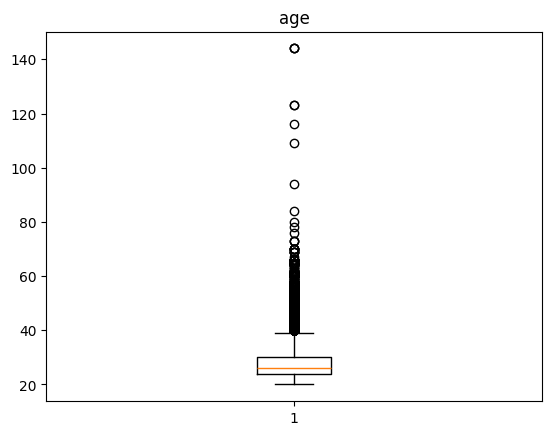

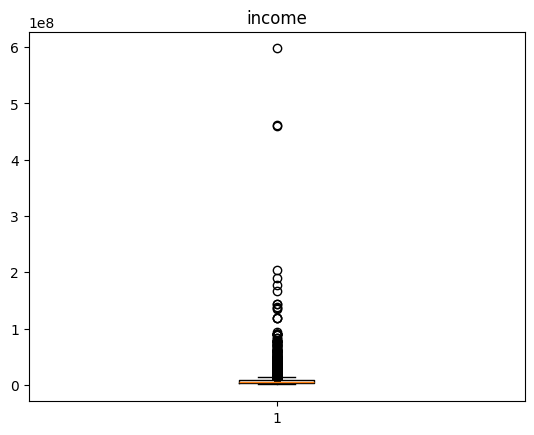

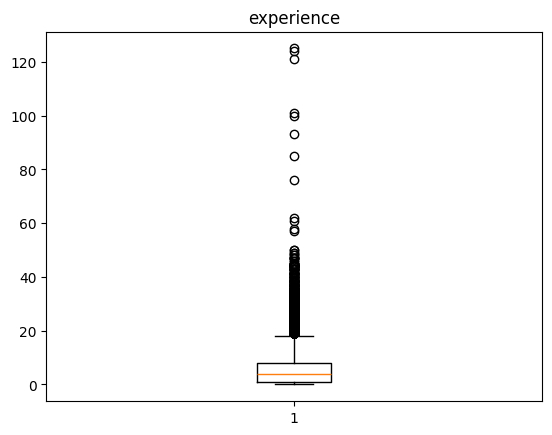

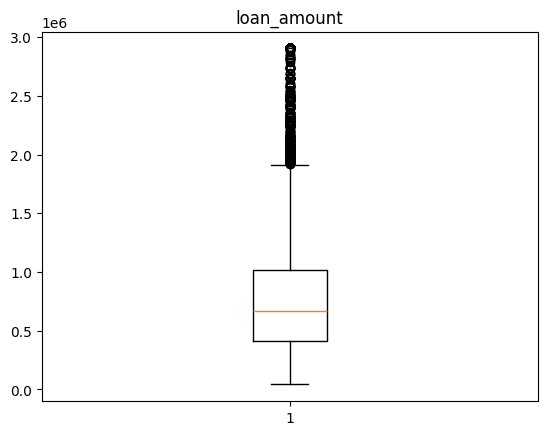

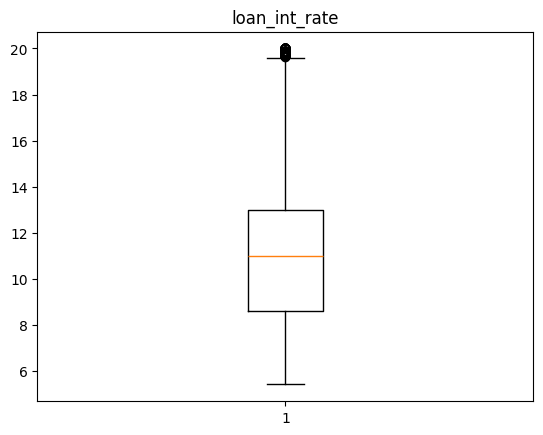

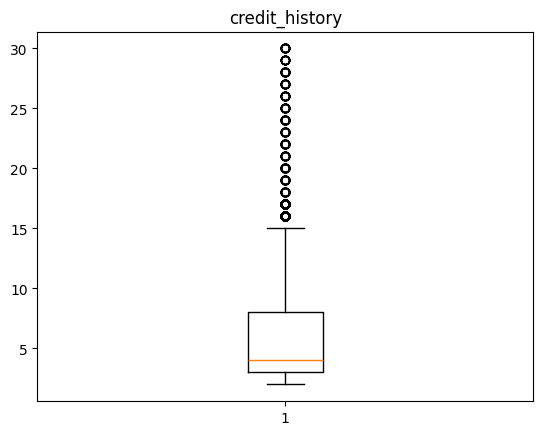

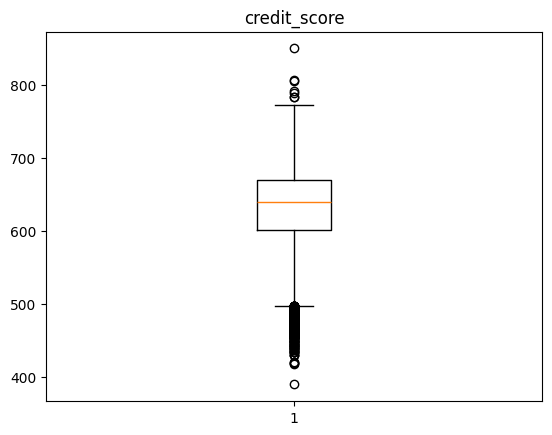

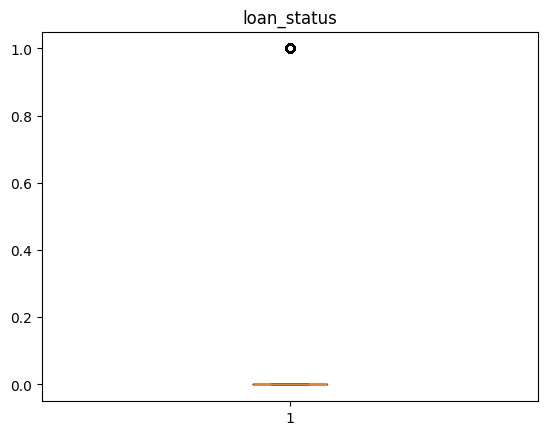

In [48]:
for i in df_new.select_dtypes('number').columns:
    plt.boxplot(df_new[i])
    plt.title(i)
    plt.show()
    print()

* Heavy presence of Outliers
* Mostly in age, income & experience

In [49]:
for i in df_new.select_dtypes('object').columns:
    print(df_new[i].value_counts())
    print()

gender
Male      24841
Female    20159
Name: count, dtype: int64

education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

home_ownership
Rent        23443
Mortgage    18489
Own          2951
Other         117
Name: count, dtype: int64

loan_intent
Education            9153
Medical              8548
Venture              7819
Personal             7552
Debtconsolidation    7145
Homeimprovement      4783
Name: count, dtype: int64

loan_defaults
Yes    22858
No     22142
Name: count, dtype: int64



#### **Outlier Handling**

In [50]:
df_cleaned = df_new.copy()
df_cleaned

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults,loan_status
0,22.0,Female,Master,5971684.0,0,Rent,2905000.0,Personal,16.02,3.0,561,No,1
1,21.0,Female,High School,1019406.0,0,Own,83000.0,Education,11.14,2.0,504,Yes,0
2,25.0,Female,High School,1032354.0,3,Mortgage,456500.0,Medical,12.87,3.0,635,No,1
3,23.0,Female,Bachelor,6619499.0,0,Rent,2905000.0,Medical,15.23,2.0,675,No,1
4,24.0,Male,Master,5489205.0,1,Rent,2905000.0,Medical,14.27,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,Male,Associate,3981593.0,6,Rent,1245000.0,Medical,15.66,3.0,645,No,1
44996,37.0,Female,Associate,5461400.0,17,Rent,747000.0,Homeimprovement,14.07,11.0,621,No,1
44997,33.0,Male,Associate,4726186.0,7,Rent,229993.0,Debtconsolidation,10.02,10.0,668,No,1
44998,29.0,Male,Bachelor,2752612.0,4,Rent,996000.0,Education,13.23,6.0,604,No,1


In [51]:
df_cleaned = df_cleaned[(df_cleaned['age'] <= 80) &
                        (df_cleaned['experience'] <= 50) &
                        (df_cleaned['home_ownership'] != 'Other')]

In [52]:
q1 = df_cleaned['income'].quantile(0.25)
q3 = df_cleaned['income'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_cleaned = df_cleaned[(df_cleaned['income'] >= lower_bound) & (df_cleaned['income'] <= upper_bound)]

In [53]:
df_cleaned

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults,loan_status
0,22.0,Female,Master,5971684.0,0,Rent,2905000.0,Personal,16.02,3.0,561,No,1
1,21.0,Female,High School,1019406.0,0,Own,83000.0,Education,11.14,2.0,504,Yes,0
2,25.0,Female,High School,1032354.0,3,Mortgage,456500.0,Medical,12.87,3.0,635,No,1
3,23.0,Female,Bachelor,6619499.0,0,Rent,2905000.0,Medical,15.23,2.0,675,No,1
4,24.0,Male,Master,5489205.0,1,Rent,2905000.0,Medical,14.27,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,Male,Associate,3981593.0,6,Rent,1245000.0,Medical,15.66,3.0,645,No,1
44996,37.0,Female,Associate,5461400.0,17,Rent,747000.0,Homeimprovement,14.07,11.0,621,No,1
44997,33.0,Male,Associate,4726186.0,7,Rent,229993.0,Debtconsolidation,10.02,10.0,668,No,1
44998,29.0,Male,Bachelor,2752612.0,4,Rent,996000.0,Education,13.23,6.0,604,No,1


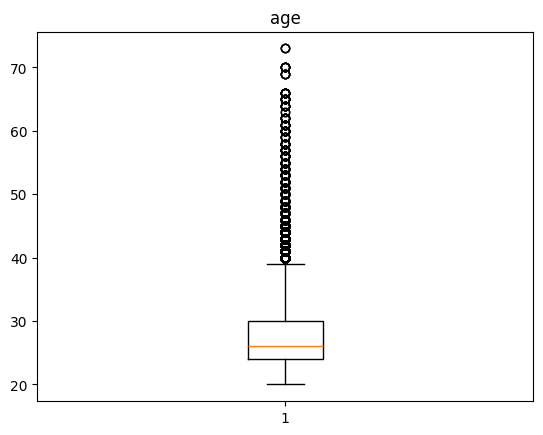

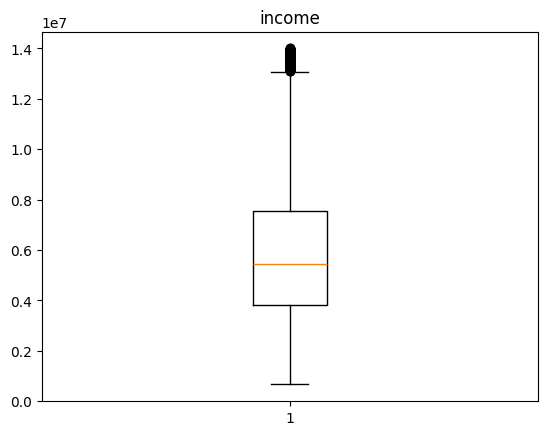

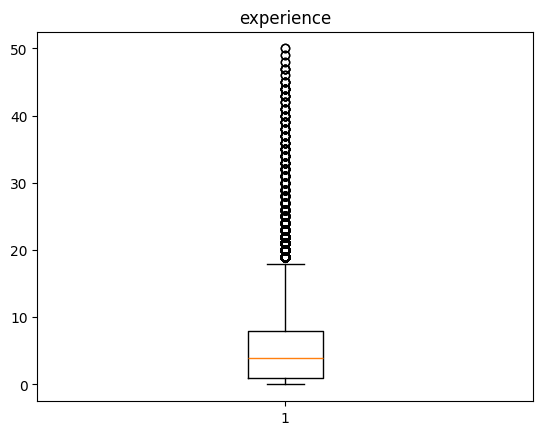

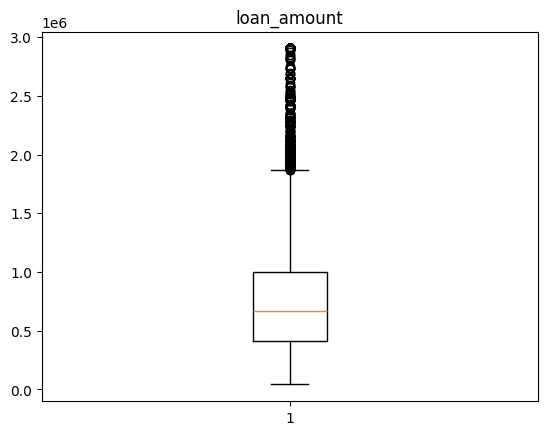

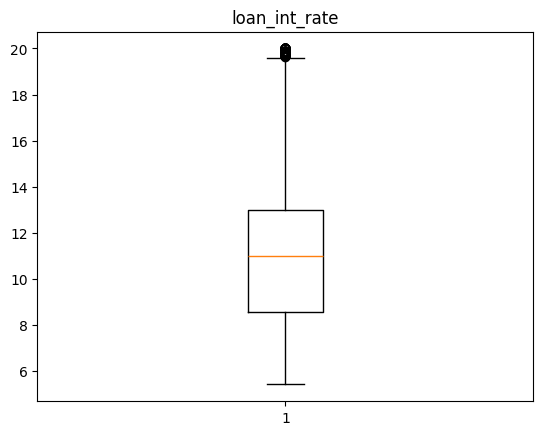

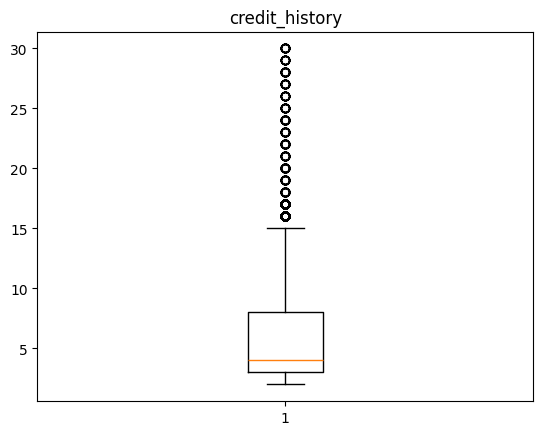

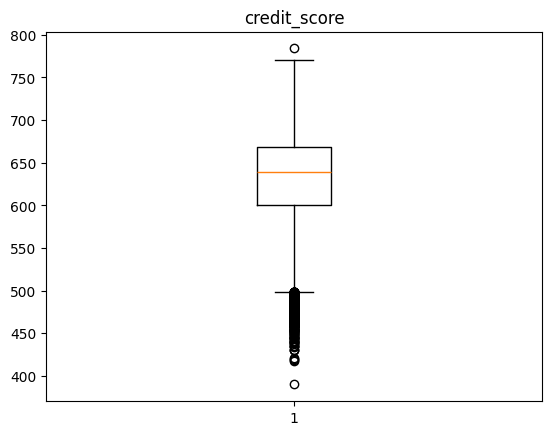

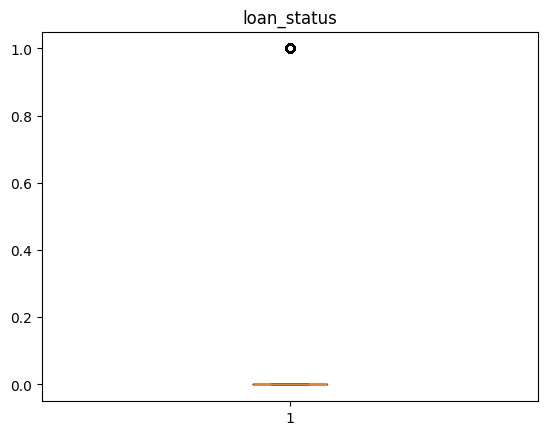

In [54]:
for i in df_cleaned.select_dtypes('number').columns:
    plt.boxplot(df_cleaned[i])
    plt.title(i)
    plt.show()
    print()

* Still not satisfied with the result income is higher than the loan amount (like `x5 times` higher).
* Most of the outlier values here are not an outlier on real world scenarios.

#### **EDA**

In [55]:
df_eda = df_cleaned.copy()

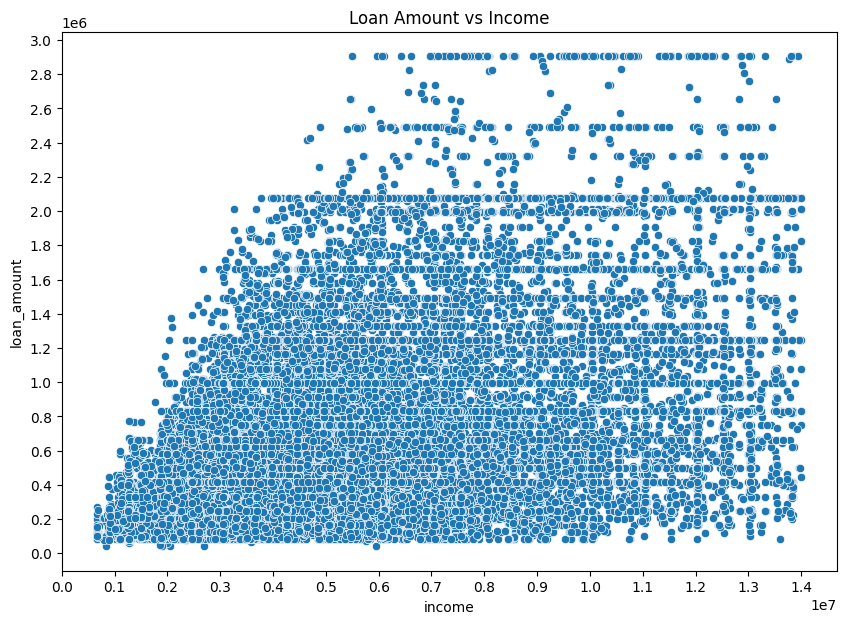

In [56]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_eda['income'],y=df_eda['loan_amount'])
plt.title('Loan Amount vs Income')
plt.xticks(ticks=np.arange(0.0,1.5e7,0.1e7))
plt.yticks(ticks=np.arange(0.0,3.1e6,0.2e6))
plt.show()

* the income being too higher than the loan amount still is distributed well. 

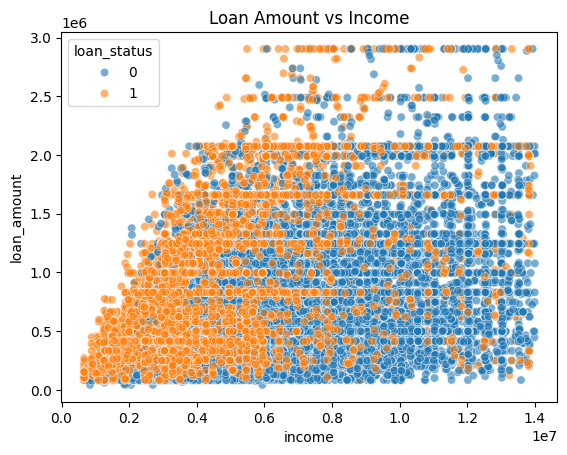

In [57]:
sns.scatterplot(x='income', y='loan_amount', hue='loan_status', data=df_eda, alpha=0.6)
plt.title('Loan Amount vs Income')
plt.show()

* Most approved loans are on income category under `0.8*1e7`.
* How is higher income people getting rejected for loan?
* Should try removing the income level above `0.9*1e7` or `1e7`.

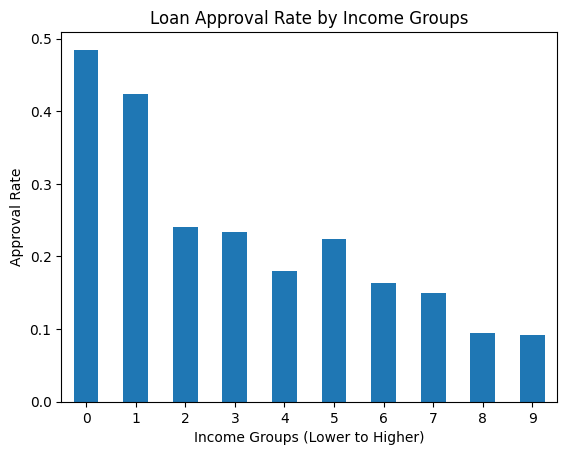

In [58]:
df_eda['income_groups'] = pd.qcut(df_eda['income'], 10, labels=False)
approval_rate = df_eda.groupby('income_groups')['loan_status'].mean()
approval_rate.plot(kind='bar')
plt.title('Loan Approval Rate by Income Groups')
plt.xlabel('Income Groups (Lower to Higher)')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.show()

* Low incomes are approved more maybe their loan amounts are lower.

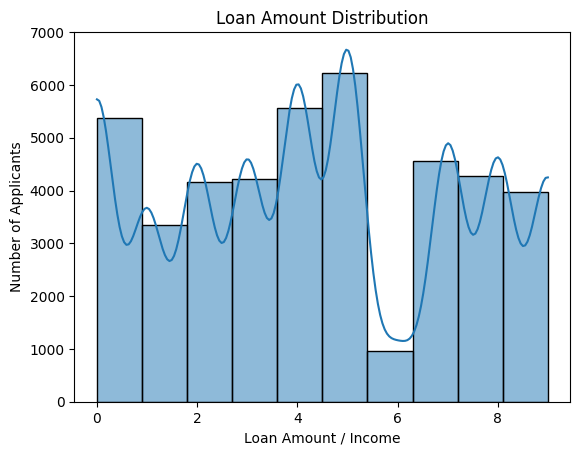

In [59]:
df_eda['loan_groups'] = pd.qcut(df_eda['loan_amount'],10,labels=False)

sns.histplot(df_eda['loan_groups'], bins=10, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount / Income')
plt.ylabel('Number of Applicants')
plt.show()

<Axes: >

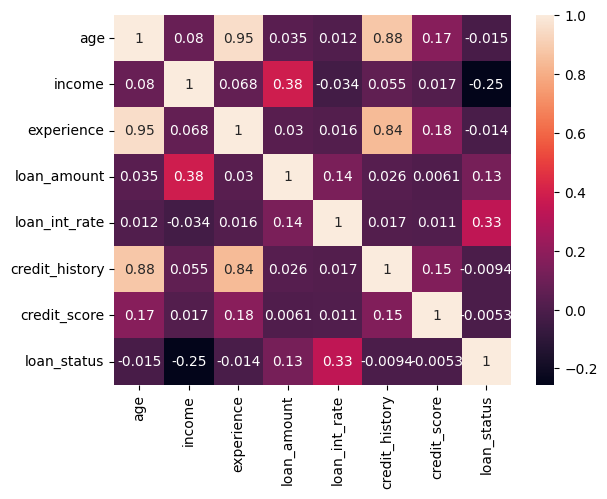

In [60]:
sns.heatmap(df_cleaned.corr(numeric_only=True),annot=True)

#### **Income Adjust**

In [61]:
df_cleaned = df_cleaned[df_cleaned['income'] <= 1e7]

In [62]:
df_cleaned.describe()

,age,income,experience,loan_amount,loan_int_rate,credit_history,credit_score,loan_status
count,38559.000000,3.855900e+04,38559.000000,3.855900e+04,38559.000000,38559.000000,38559.000000,38559.000000
mean,27.508079,5.283461e+06,5.178272,7.346942e+05,10.998544,5.734796,632.273010,0.243808
std,5.816695,2.049192e+06,5.818526,4.734999e+05,2.971590,3.824289,50.333861,0.429384
min,20.000000,6.640000e+05,0.000000,4.150000e+04,5.420000,2.000000,390.000000,0.000000
25%,23.000000,3.663080e+06,1.000000,4.052060e+05,8.590000,3.000000,601.000000,0.000000
50%,26.000000,5.071798e+06,3.000000,6.225000e+05,11.010000,4.000000,639.000000,0.000000
75%,30.000000,6.758358e+06,8.000000,9.960000e+05,13.040000,8.000000,669.000000,0.000000
max,73.000000,9.999093e+06,50.000000,2.905000e+06,20.000000,30.000000,784.000000,1.000000


### **Data Preprocessing 2**

#### **Model Details Dictionary**

In [63]:
model_dict = {}

#### **Features & Label**

In [64]:
x = df_cleaned.drop(columns=['loan_status'])
y = df_cleaned['loan_status']

#### **Imbalance Handling**

In [65]:
y.value_counts()

loan_status
0    29158
1     9401
Name: count, dtype: int64

In [66]:
ros = RandomOverSampler()
x_res,y_res = ros.fit_resample(x,y)

In [67]:
y_res.value_counts()

loan_status
1    29158
0    29158
Name: count, dtype: int64

#### **Data Splitting**

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

#### **Data Encoding**

In [69]:
obj_cols = x_train.select_dtypes('object').columns
obj_cols

Index(['gender', 'education', 'home_ownership', 'loan_intent',
       'loan_defaults'],
      dtype='object')

In [70]:
le_gender = LabelEncoder()
x_train['gender'] = le_gender.fit_transform(x_train['gender'])

le_education = LabelEncoder()
x_train['education'] = le_education.fit_transform(x_train['education'])

le_home_ownership = LabelEncoder()
x_train['home_ownership'] = le_home_ownership.fit_transform(x_train['home_ownership'])

le_loan_intent = LabelEncoder()
x_train['loan_intent'] = le_loan_intent.fit_transform(x_train['loan_intent'])

le_loan_defaults = LabelEncoder()
x_train['loan_defaults'] = le_loan_defaults.fit_transform(x_train['loan_defaults'])

In [71]:
x_train

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults
50895,27.0,0,3,5678362.0,3,0,697200.0,1,9.59,8.0,618,0
32381,25.0,0,0,8462182.0,3,2,539500.0,5,11.52,4.0,632,1
52082,27.0,1,3,6646972.0,6,2,498000.0,0,11.01,8.0,631,0
25687,38.0,0,2,4100781.0,15,0,1245000.0,1,16.07,14.0,667,0
48829,26.0,1,4,3084529.0,2,2,971100.0,3,11.71,2.0,610,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54343,22.0,1,3,4377171.0,1,2,1195200.0,0,7.88,2.0,563,0
38158,23.0,1,0,3945405.0,4,2,996000.0,1,10.94,3.0,667,0
860,23.0,0,0,2560218.0,2,0,415000.0,1,12.69,2.0,670,0
15795,26.0,0,0,2152771.0,3,1,664000.0,5,13.79,2.0,663,1


In [72]:
model_dict['gender'] = le_gender
model_dict['education'] = le_education
model_dict['home_ownership'] = le_home_ownership
model_dict['loan_intent'] = le_loan_intent
model_dict['loan_defaults'] = le_loan_defaults

model_dict

{'gender': LabelEncoder(),
 'education': LabelEncoder(),
 'home_ownership': LabelEncoder(),
 'loan_intent': LabelEncoder(),
 'loan_defaults': LabelEncoder()}

#### **Correlation Check**

In [73]:
df_encoded = x_train.join(y_train)
df_encoded.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults,loan_status
50895,27.0,0,3,5678362.0,3,0,697200.0,1,9.59,8.0,618,0,1
32381,25.0,0,0,8462182.0,3,2,539500.0,5,11.52,4.0,632,1,0
52082,27.0,1,3,6646972.0,6,2,498000.0,0,11.01,8.0,631,0,1
25687,38.0,0,2,4100781.0,15,0,1245000.0,1,16.07,14.0,667,0,0
48829,26.0,1,4,3084529.0,2,2,971100.0,3,11.71,2.0,610,0,1


In [74]:
df_encoded.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)

loan_status       1.000000
loan_int_rate     0.371427
home_ownership    0.281085
loan_amount       0.160997
education         0.001997
gender           -0.001899
credit_score     -0.012223
credit_history   -0.015155
experience       -0.019897
age              -0.020291
loan_intent      -0.078989
income           -0.302459
loan_defaults    -0.698418
Name: loan_status, dtype: float64

#### **Normalization**

In [75]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [76]:
model_dict['scaler'] = scaler
model_dict

{'gender': LabelEncoder(),
 'education': LabelEncoder(),
 'home_ownership': LabelEncoder(),
 'loan_intent': LabelEncoder(),
 'loan_defaults': LabelEncoder(),
 'scaler': StandardScaler()}

#### **Test Data Transform**

In [77]:
x_test.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults
29930,25.0,Female,High School,9350199.0,0,Rent,830000.0,Education,9.12,5.0,647,Yes
20485,28.0,Female,Associate,6079418.0,6,Mortgage,1245000.0,Debtconsolidation,11.99,6.0,559,Yes
20985,31.0,Female,Doctorate,5885115.0,8,Mortgage,1328000.0,Debtconsolidation,11.01,8.0,656,No
2229,24.0,Male,High School,2410320.0,0,Rent,249000.0,Education,8.00,3.0,586,Yes
40103,26.0,Female,Associate,2882258.0,0,Rent,1203500.0,Personal,12.53,3.0,598,No


In [78]:
x_test['gender'] = model_dict['gender'].transform(x_test['gender'])
x_test['education'] = model_dict['education'].transform(x_test['education'])
x_test['home_ownership'] = model_dict['home_ownership'].transform(x_test['home_ownership'])
x_test['loan_intent'] = model_dict['loan_intent'].transform(x_test['loan_intent'])
x_test['loan_defaults'] = model_dict['loan_defaults'].transform(x_test['loan_defaults'])

In [79]:
x_test.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_defaults
29930,25.0,0,3,9350199.0,0,2,830000.0,1,9.12,5.0,647,1
20485,28.0,0,0,6079418.0,6,0,1245000.0,0,11.99,6.0,559,1
20985,31.0,0,2,5885115.0,8,0,1328000.0,0,11.01,8.0,656,0
2229,24.0,1,3,2410320.0,0,2,249000.0,1,8.00,3.0,586,1
40103,26.0,0,0,2882258.0,0,2,1203500.0,4,12.53,3.0,598,0


### **Model Selection**

In [80]:
models = [KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier()]

for i in models:
    print(i)
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    # print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      5812
           1       0.77      0.86      0.82      5852

    accuracy                           0.80     11664
   macro avg       0.81      0.80      0.80     11664
weighted avg       0.81      0.80      0.80     11664


SVC()
              precision    recall  f1-score   support

           0       0.67      0.79      0.73      5812
           1       0.75      0.61      0.67      5852

    accuracy                           0.70     11664
   macro avg       0.71      0.70      0.70     11664
weighted avg       0.71      0.70      0.70     11664


GaussianNB()
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      5812
           1       0.69      0.72      0.70      5852

    accuracy                           0.69     11664
   macro avg       0.69      0.69      0.69     11664
weighted avg       0.69      0

* Decision Tree already provides the best performance (95%)
* Lets try Ensemble techniques also also

### **Ensemble Techniques**

In [81]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5812
           1       0.94      0.99      0.96      5852

    accuracy                           0.96     11664
   macro avg       0.96      0.96      0.96     11664
weighted avg       0.96      0.96      0.96     11664



In [82]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      5812
           1       0.86      0.93      0.90      5852

    accuracy                           0.89     11664
   macro avg       0.89      0.89      0.89     11664
weighted avg       0.89      0.89      0.89     11664



* Random Forest gives best result 96%

### **Hyperparameter Tuning**

In [83]:
params = {
    'n_estimators': [100, 200],            
    'max_depth': [10, 20, None],           
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],        
    'max_features': ['sqrt', 'log2'],      
    'bootstrap': [True, False]             
}

In [84]:
# rscv = RandomizedSearchCV(rfc,params,cv=5,scoring="accuracy")
# rscv.fit(x_train,y_train)

In [85]:
# rscv = GridSearchCV(rfc,params,cv=5,scoring="accuracy")
# rscv.fit(x_train,y_train)

In [86]:
# rfc = RandomForestClassifier(bootstrap=False, max_features='log2',min_samples_split=5, n_estimators=200)
rfc = RandomForestClassifier(bootstrap=False, max_features='log2')
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5812
           1       0.96      0.98      0.97      5852

    accuracy                           0.97     11664
   macro avg       0.97      0.97      0.97     11664
weighted avg       0.97      0.97      0.97     11664



* Performance improvement from 96% to 97% on Random Search
* Performance improvement from 96% to 97% on Grid Search

### **Cross Validation**

In [87]:
cvs = cross_val_score(rfc,x_train,y_train,cv=5,scoring='accuracy')
print(cvs)
print(cvs.mean())

[0.96077591 0.95959704 0.96184352 0.96162915 0.96302251]
0.9613736254458652


In [88]:
model_dict['model'] = rfc

### **Model Export**

In [89]:
model_dict
with open('Loan_Status_Model.pkl','wb') as f:
    pickle.dump(model_dict,f)